In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

df = pd.read_excel('/Users/mihirpamnani/Desktop/Omnify-Analyst-Intership-Task.xlsx','Listing Site Data')

In [2]:
df.shape

(2091, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   object        
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2089 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     object        
 11  Paid Date         13 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 196.2+ KB


In [4]:
#Preprocessing - Date of Report must be date-time and Paid as float 

df['Date of Report'] = pd.to_datetime(df['Date of Report'])
df['Paid'] = df['Paid'].replace('[\$,]', '', regex=True).astype(float)

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-------------------------')

Product Name
['Omnify']
-------------------------
Categories
['Coaching' 'Dance Studio' 'Personal Trainer' 'Scheduling'
 'Class Registration' 'Fitness' 'Swim School' 'Yoga Studio'
 'Camp Management' 'Music School' 'Reservations' 'Club Management'
 'Gymnastics' 'Venue Management' 'Membership Management'
 'Parks and Recreation' 'Spa' 'Martial Arts' 'Pilates Studio']
-------------------------
Date of Report
['2020-10-20T00:00:00.000000000' '2020-10-21T00:00:00.000000000'
 '2020-10-22T00:00:00.000000000' '2020-10-23T00:00:00.000000000'
 '2020-10-24T00:00:00.000000000' '2020-10-25T00:00:00.000000000'
 '2020-10-26T00:00:00.000000000' '2020-10-27T00:00:00.000000000'
 '2020-10-28T00:00:00.000000000' '2020-10-29T00:00:00.000000000'
 '2020-10-30T00:00:00.000000000' '2020-10-31T00:00:00.000000000'
 '2020-11-01T00:00:00.000000000' '2020-11-02T00:00:00.000000000'
 '2020-11-03T00:00:00.000000000' '2020-11-04T00:00:00.000000000'
 '2020-11-05T00:00:00.000000000' '2020-11-06T00:00:00.000000000'
 '2020-

In [6]:
#Checking for missing values
df.isnull().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
dtype: int64

In [7]:
df.describe()

,Average Position,Clicks,Leads,Money Spent ($),Prospects,Paid
count,2090.000000,2090.000000,163.000000,2089.000000,66.000000,14.000000
mean,10.731464,1.663636,1.141104,12.074318,1.030303,1675.714286
std,11.219817,2.798869,0.542938,39.172291,0.172733,903.848390
min,0.000000,1.000000,1.000000,2.000000,1.000000,549.000000
25%,3.000000,1.000000,1.000000,2.000000,1.000000,1032.000000
50%,8.000000,1.000000,1.000000,7.250000,1.000000,1788.000000
75%,13.000000,2.000000,1.000000,12.250000,1.000000,2023.500000
max,74.000000,80.000000,6.000000,1460.000000,2.000000,4000.000000


/var/folders/p_/f89n2mxs5zj__f5w8jwgv7c40000gn/T/ipykernel_87689/4226894128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/p_/f89n2mxs5zj__f5w8jwgv7c40000gn/T/ipykernel_87689/4226894128.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

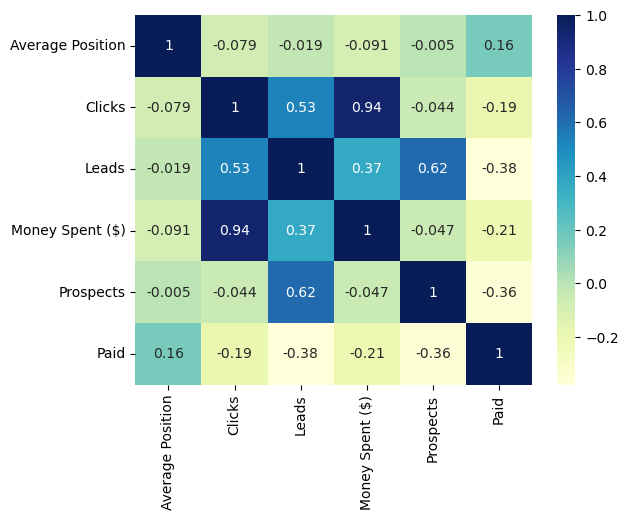

In [8]:
df.corr()
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Above co-relation matrix shows strong relationships between following variables (>0.5) :
1. Money Spent($) and Clicks
2. Leads and Clicks
3. Leads and Prospects

<b>EDA - Univarite</b>

In [9]:
#1.Category
print("Categories and their number of data points : \n", df.Categories.value_counts())

Categories and their number of data points : 
 Reservations             458
Membership Management    347
Scheduling               291
Class Registration       251
Coaching                 212
Fitness                  132
Parks and Recreation     109
Yoga Studio               61
Swim School               47
Dance Studio              43
Personal Trainer          40
Club Management           33
Venue Management          23
Camp Management           21
Music School              11
Spa                        7
Gymnastics                 3
Martial Arts               1
Pilates Studio             1
Name: Categories, dtype: int64


In [10]:
#2. Average Positions
print("Average positions and their number of data points : \n", df['Average Position'].value_counts())

Average positions and their number of data points : 
 1.00     317
5.00     146
10.00    129
8.00     125
2.00     124
        ... 
9.88       1
65.00      1
7.78       1
8.89       1
7.32       1
Name: Average Position, Length: 135, dtype: int64


In [11]:
#3. Clicks
print("Clicks and their number of data points : \n",df['Clicks'].value_counts())

Clicks and their number of data points : 
 1.0     1491
2.0      372
3.0      110
4.0       46
5.0       21
6.0       19
7.0        6
8.0        5
9.0        5
11.0       3
17.0       2
80.0       1
34.0       1
14.0       1
21.0       1
10.0       1
22.0       1
60.0       1
19.0       1
24.0       1
31.0       1
Name: Clicks, dtype: int64


In [12]:
#4.Leads
print("Leads and their number of data points : \n",df['Leads'].value_counts())

Leads and their number of data points : 
 1.0    147
2.0     13
6.0      1
3.0      1
4.0      1
Name: Leads, dtype: int64


In [13]:
#5.Money Spent
print("Money Spent and their number of data points : \n",df['Money Spent ($)'].value_counts())

Money Spent and their number of data points : 
 2.00      714
10.25      89
4.00       79
10.50      70
20.50      52
         ... 
630.00      1
33.50       1
35.25       1
62.00       1
317.75      1
Name: Money Spent ($), Length: 159, dtype: int64


In [14]:
#6.Channel
print("Channel and their number of data points : \n",df['Channel'].value_counts())

Channel and their number of data points : 
 Capterra           1211
GetApp              825
Software Advice      55
Name: Channel, dtype: int64


In [15]:
#7. Location
print("Location and their number of data points : \n",df['Location'].value_counts())

Location and their number of data points : 
 UNITED STATES     902
UNITED KINGDOM    389
SINGAPORE         244
AUSTRALIA         213
CANADA            197
United States      73
United Kingdom     26
Canada             14
Singapore          12
Australia          12
USA                 6
Middle East         1
UK                  1
US                  1
Name: Location, dtype: int64


In [16]:
#8.Prospects
print("Prospects and their number of data points : \n",df['Prospects'].value_counts())

Prospects and their number of data points : 
 1.0    64
2.0     2
Name: Prospects, dtype: int64


In [17]:
#9.Paid
print("Paid and their number of data points : \n",df['Paid'].value_counts())

Paid and their number of data points : 
 1788.0    3
980.0     2
1188.0    2
549.0     2
1794.0    1
2388.0    1
2380.0    1
4000.0    1
2100.0    1
Name: Paid, dtype: int64


<b>EDA - Bivarite</b>

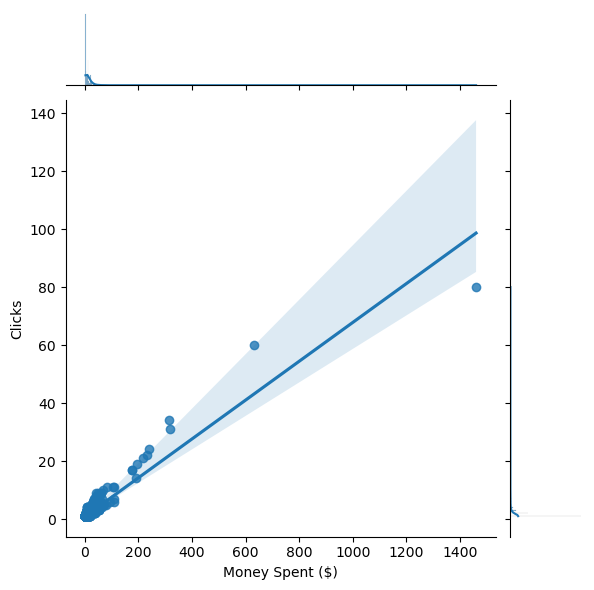

In [18]:
#Co-relation analysis
sns.jointplot(data=df, x="Money Spent ($)", y="Clicks", kind="reg")


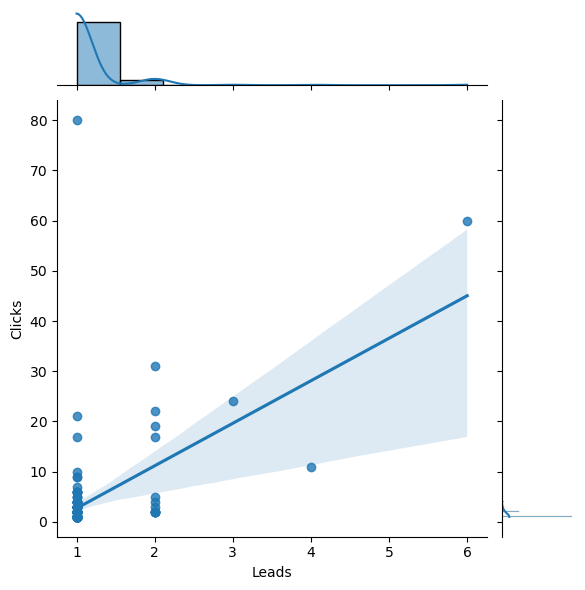

In [19]:
sns.jointplot(data=df, x="Leads", y="Clicks", kind="reg")


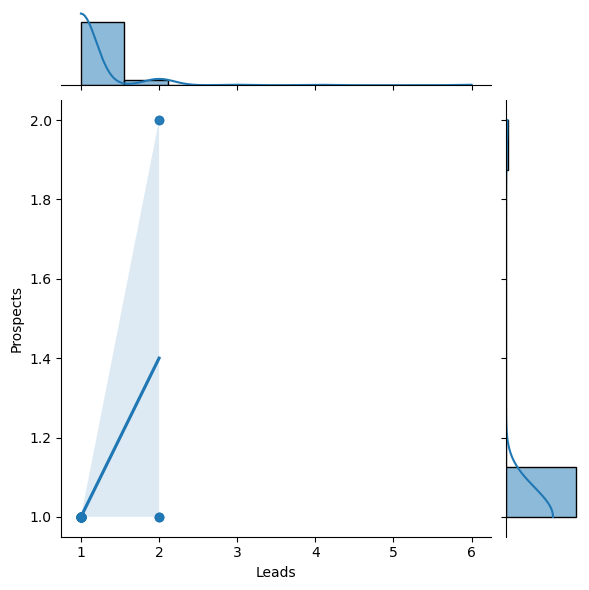

In [20]:
sns.jointplot(data=df, x="Leads", y="Prospects", kind="reg")

<b>EDA - Multivarite</b>

           Channel  Clicks  Leads  Returns
0         Capterra  2377.0  138.0  3196.79
1           GetApp  1039.0   44.0   170.29
2  Software Advice    61.0    4.0   448.50


<Axes: ylabel='Channel'>

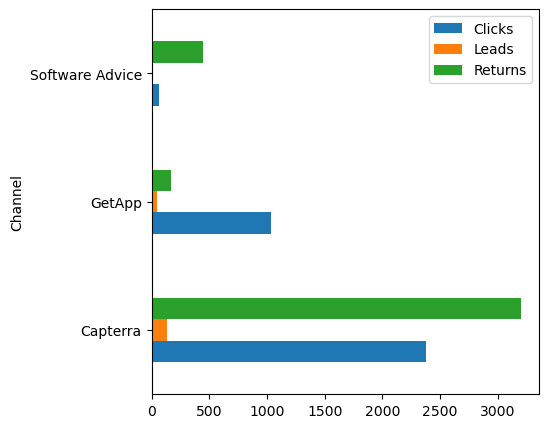

In [21]:
#Channel Analysis
df['Returns']=round(df['Paid']/df['Money Spent ($)'],2) #Assumed that this is equivalent to Payment/Cost
df_keyword_filtered = df.groupby("Channel").agg({'Clicks': 'sum', 'Leads': 'sum', 'Returns':'sum'}).reset_index()
print(df_keyword_filtered)

df_keyword_filtered.plot(x='Channel',kind='barh',figsize = (5,5))

               Categories  Clicks  Leads  Returns
0         Camp Management    24.0    0.0     0.00
1      Class Registration   362.0   29.0   637.26
2         Club Management    37.0    1.0     0.00
3                Coaching   278.0    6.0     0.00
4            Dance Studio    47.0    2.0     0.00
5                 Fitness   160.0    5.0   105.60
6              Gymnastics     3.0    0.0     0.00
7            Martial Arts     1.0    0.0     0.00
8   Membership Management   482.0   32.0   183.38
9            Music School    12.0    0.0     0.00
10   Parks and Recreation   121.0    3.0  2000.00
11       Personal Trainer    42.0    0.0     0.00
12         Pilates Studio     1.0    0.0     0.00
13           Reservations   702.0   54.0   260.94
14             Scheduling  1047.0   49.0   628.40
15                    Spa     7.0    0.0     0.00
16            Swim School    57.0    5.0     0.00
17       Venue Management    24.0    0.0     0.00
18            Yoga Studio    70.0    0.0     0.00


<Axes: ylabel='Categories'>

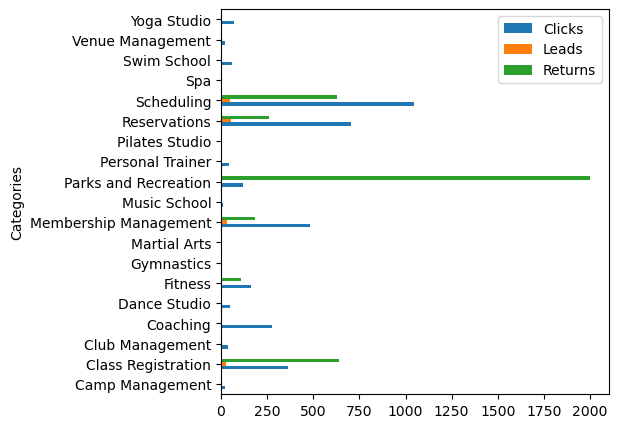

In [22]:
#Catgories analysis
df_keyword_filtered = df.groupby("Categories").agg({'Clicks': 'sum', 'Leads': 'sum', 'Returns':'sum'}).reset_index()
print(df_keyword_filtered)

df_keyword_filtered.plot(x='Categories',kind='barh',figsize = (5, 5))

   Date of Report  Leads  Clicks  Returns
0      2020-10-25    0.0    42.0     0.00
1      2020-11-01    0.0   103.0     0.00
2      2020-11-08    5.0    92.0     0.00
3      2020-11-15    3.0   241.0     0.00
4      2020-11-22    2.0   119.0     0.00
5      2020-11-29    1.0    64.0   448.50
6      2020-12-06    4.0    90.0     0.00
7      2020-12-13    6.0   125.0   115.29
8      2020-12-20    4.0   112.0   183.38
9      2020-12-27    5.0   162.0   404.82
10     2021-01-03    4.0   138.0     0.00
11     2021-01-10    3.0   155.0     0.00
12     2021-01-17   14.0   202.0     0.00
13     2021-01-24   15.0   185.0     0.00
14     2021-01-31    4.0    80.0     0.00
15     2021-02-07   11.0   179.0     0.00
16     2021-02-14   18.0   211.0     0.00
17     2021-02-21    9.0   161.0  2061.03
18     2021-02-28    6.0   118.0   162.55
19     2021-03-07   10.0   116.0    25.53
20     2021-03-14   14.0   121.0   170.29
21     2021-03-21    7.0   102.0    65.12
22     2021-03-28    7.0    89.0  

<Axes: ylabel='Date of Report'>

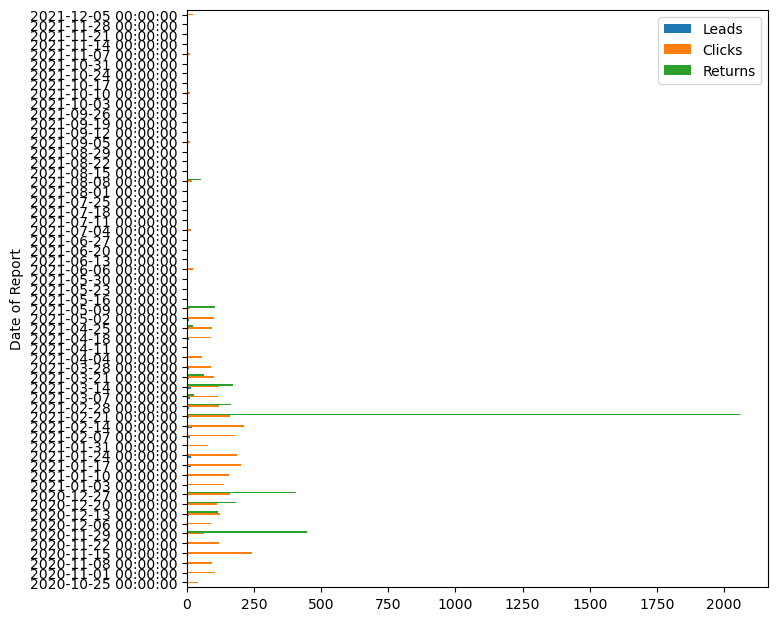

In [47]:
#Weekly Report

df_weekly_filtered = df.groupby([pd.Grouper(key = 'Date of Report', freq = 'W')]).agg({'Leads': 'sum', 'Clicks': 'sum', 'Returns':'sum'}).reset_index()
print(df_weekly_filtered)

df_weekly_filtered.plot(x='Date of Report',kind='barh',figsize = (7.5, 7.5))


         Location  Clicks  Leads  Returns
0       Australia   279.0    8.0     0.00
1          Canada   251.0   11.0   298.67
2     Middle East     1.0    1.0     0.00
3       Singapore   471.0   28.0   162.55
4  United Kingdom   713.0   21.0   459.03
5   United States  1762.0  117.0  2895.33


<Axes: ylabel='Location'>

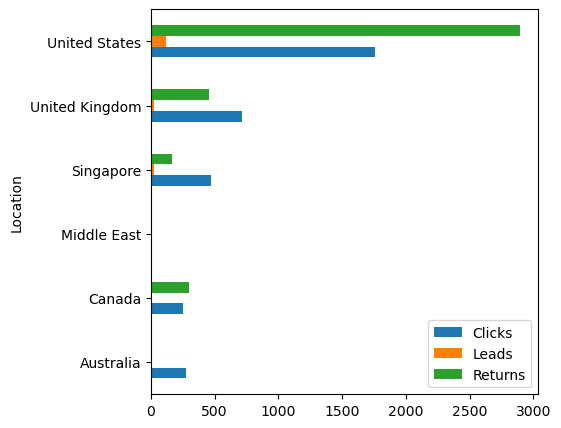

In [27]:
#Location analysis\
df['Location'] = df['Location'].str.title()
df['Location'] = df['Location'].replace('Uk', 'United Kingdom', regex=True)
df['Location'] = df['Location'].replace('Us', 'United States', regex=True)
df['Location'] = df['Location'].replace('Usa', 'United States', regex=True)
df['Location'] = df['Location'].replace('United Statesa', 'United States', regex=True)


df_keyword_filtered = df.groupby("Location").agg({'Clicks': 'sum', 'Leads': 'sum', 'Returns':'sum'}).reset_index()
print(df_keyword_filtered)

df_keyword_filtered.plot(x='Location',kind='barh',figsize = (5, 5))

<Axes: xlabel='Date of Report'>

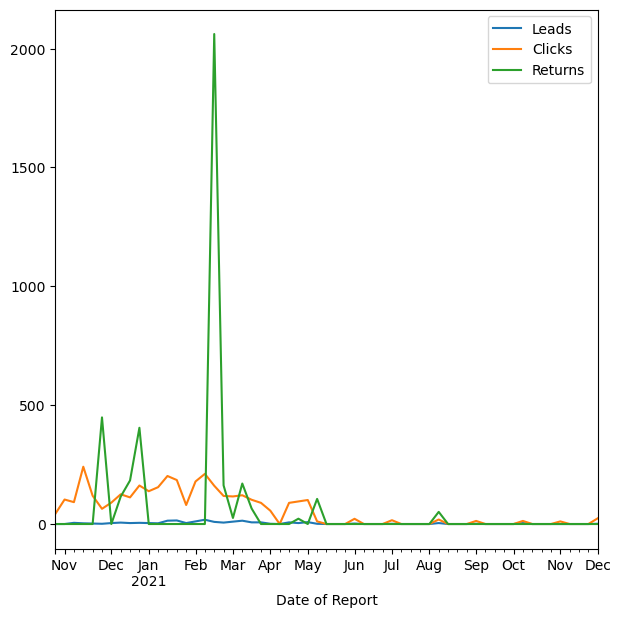

In [50]:
#Time-Series Analysis on Weekly report
df_weekly_filtered.plot(x='Date of Report',figsize = (7, 7))


      Month  Leads  Clicks  Returns
0   2020-10    0.0   134.0     0.00
1   2020-11   12.0   548.0   448.50
2   2020-12   22.0   557.0   703.49
3   2021-01   36.0   671.0     0.00
4   2021-02   44.0   669.0  2223.58
5   2021-03   39.0   476.0   260.94
6   2021-04   19.0   293.0    22.40
7   2021-05    1.0    11.0   105.60
8   2021-06    2.0    22.0     0.00
9   2021-07    1.0    16.0     0.00
10  2021-08    4.0    19.0    51.07
11  2021-09    1.0    13.0     0.00
12  2021-10    4.0    13.0     0.00
13  2021-11    0.0    11.0     0.00
14  2021-12    1.0    24.0     0.00


<Axes: ylabel='Month'>

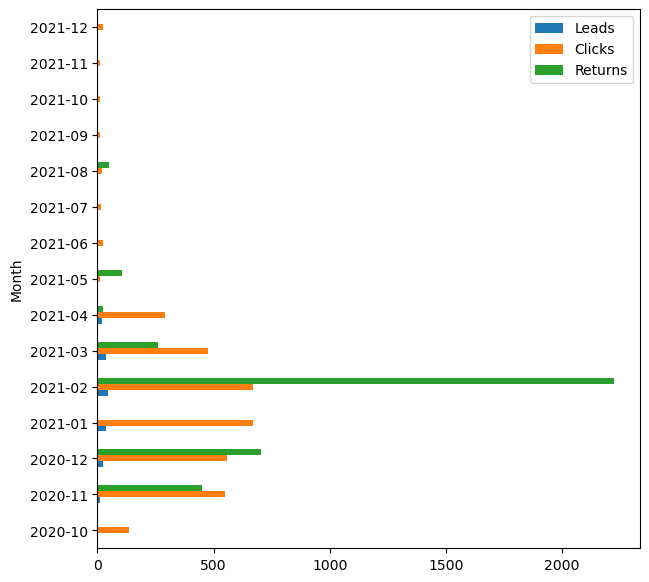

In [49]:
#Monthly Report

month= pd.to_datetime(df['Date of Report']).dt.strftime('%Y-%m')
#df.insert(loc = 0,column = 'Month',value = month)
df.drop(['Date of Report'],axis=1)

df_monthly_filtered = df.groupby("Month").agg({'Leads': 'sum', 'Clicks': 'sum', 'Returns':'sum'}).reset_index()
print(df_monthly_filtered)

df_monthly_filtered.plot(x='Month',kind='barh',figsize = (7, 7))



<Axes: xlabel='Month'>

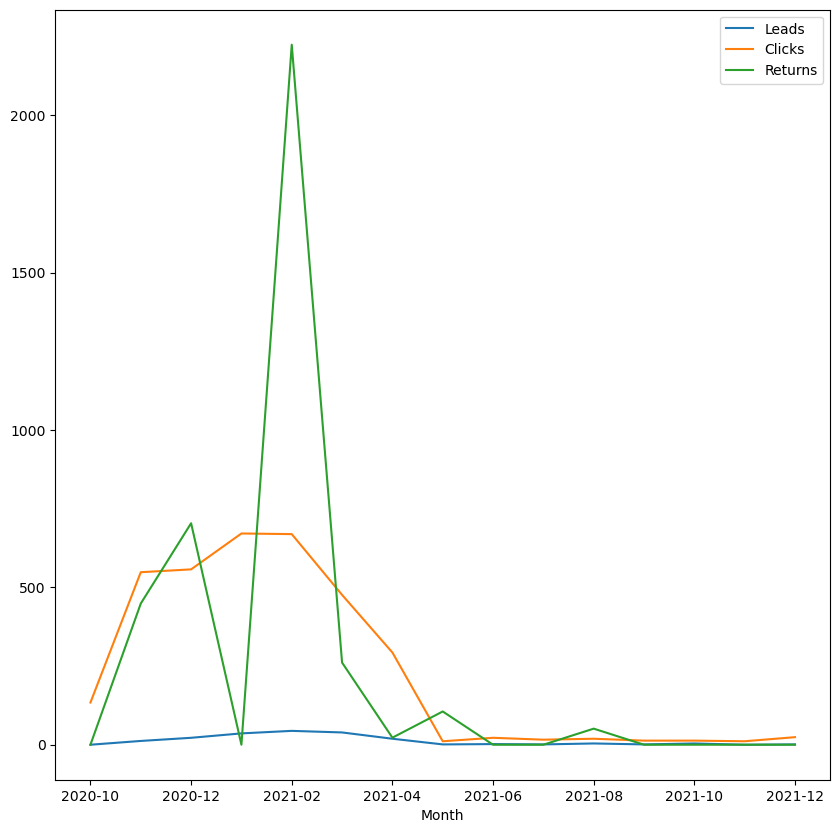

In [30]:
#Time-Series Analysis on Monthly report
df_monthly_filtered.plot(x='Month',figsize = (10, 10))

## 